# **Use Case: Predictive Modeling for Hospital Readmission Risk**


The use case is centered on a critical challenge in the healthcare industry: unplanned patient readmissions. A readmission occurs when a patient who has been discharged from a hospital has to be admitted again within a short period (typically 30 days). This is a significant concern because it often indicates potential gaps in patient care and leads to major financial and operational burdens for hospitals.



High readmission rates are often a symptom of underlying issues. The patient may have been discharged prematurely, may not have understood their post-discharge care instructions, or may lack the necessary support at home. This leads to a decline in the patient's health and a lower quality of care.



Unplanned readmissions strain hospital resources. They create unexpected demand for beds, staff, and medical equipment, which disrupts scheduled procedures and can lead to overcrowding and staff burnout.







**The Objective: Proactive Risk Stratification**


The primary objective of this project is to build a machine learning model that can accurately predict the likelihood of a patient being readmitted. The goal is not just to build a model, but to create a tool that enables a fundamental shift from reactive to proactive patient care.

1. Identify High-Risk Patients Early
2. Generate a Risk Probability

# **DATASET**

https://www.kaggle.com/datasets/dubradave/hospital-readmissions?resource=download

**Information in the Dataset**

**"age"** - age bracket of the patient

**"time_in_hospital"** - days (from 1 to 14)

**"n_procedures"** - number of procedures performed during the hospital stay

**"n_lab_procedures"** - number of laboratory procedures performed during the hospital stay

**"n_medications"** - number of medications administered during the hospital stay

**"n_outpatient"**- number of outpatient visits in the year before a hospital stay

**"n_inpatient"** - number of inpatient visits in the year before the hospital stay

**"n_emergency"-** number of visits to the emergency room in the year before the hospital stay

**"medical_specialty"** - the specialty of the admitting physician

**"diag_1"**- primary diagnosis (Circulatory, Respiratory, Digestive, etc.)

**"diag_2"**- secondary diagnosis

**"diag_3"** - additional secondary diagnosis

**"glucose_test"** - whether the glucose serum came out as high (> 200), normal, or not performed

**"A1Ctest"** - whether the A1C level of the patient came out as high (> 7%), normal, or not performed

**"change"** - whether there was a change in the diabetes medication ('yes' or 'no')

**"diabetes_med"** - whether a diabetes medication was prescribed ('yes' or 'no')

**"readmitted"** - if the patient was readmitted at the hospital ('yes' or 'no')



# **STEP 1: INITIAL SETUP & LIBRARY IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency  # stat test for categorical variable
from sklearn.preprocessing import OneHotEncoder # convert categorical variable to binary columns
import plotly.express as px #high level api for quick interactive visualization
import plotly.graph_objects as go # low level interface for customized plots
from plotly.subplots import make_subplots #multi-panel figures
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
pd.set_option('display.max_columns', None) #to show all columns in df
pd.set_option('display.max_rows', 100)  #preventing truncation(...) while displaying df i.e., very large
pd.set_option('display.width', None)  # width adjustment - df can use full console width
warnings.filterwarnings('ignore')   # suppresses warning from the libraries - gives clean & focused results

In [ ]:
plt.style.use('seaborn-v0_8')  # predefining the plot style - cleaner and professional aesthetic w/o any manual intervention
sns.set_palette("husl")  # sets palette - 'hus1' -> evenly spaced hues

# **STEP 2: DATA LOADING & INITIAL EXPLORATION**

In [ ]:
df = pd.read_csv('/content/hospital_readmissions.csv')

In [ ]:
print(f"\n DATASET OVERVIEW:")
print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

print(f"\n COLUMN NAMES:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n DATA TYPES:")
print(df.dtypes)

print(f"\n BASIC STATISTICS:")
print(df.describe())

print(f"FIRST 5 ROWS:")
print(df.head())

print(f"\n LAST 5 ROWS:")
print(df.tail())




 DATASET OVERVIEW:
Dataset Shape: (25000, 17)
Rows: 25,000
Columns: 17

 COLUMN NAMES:
 1. age
 2. time_in_hospital
 3. n_lab_procedures
 4. n_procedures
 5. n_medications
 6. n_outpatient
 7. n_inpatient
 8. n_emergency
 9. medical_specialty
10. diag_1
11. diag_2
12. diag_3
13. glucose_test
14. A1Ctest
15. change
16. diabetes_med
17. readmitted

 DATA TYPES:
age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

 BASIC STATISTICS:
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.0000

# **STEP 3 : ANALYZING FEATURES & RELATIONSHIP USING VISUALIZATIONS**

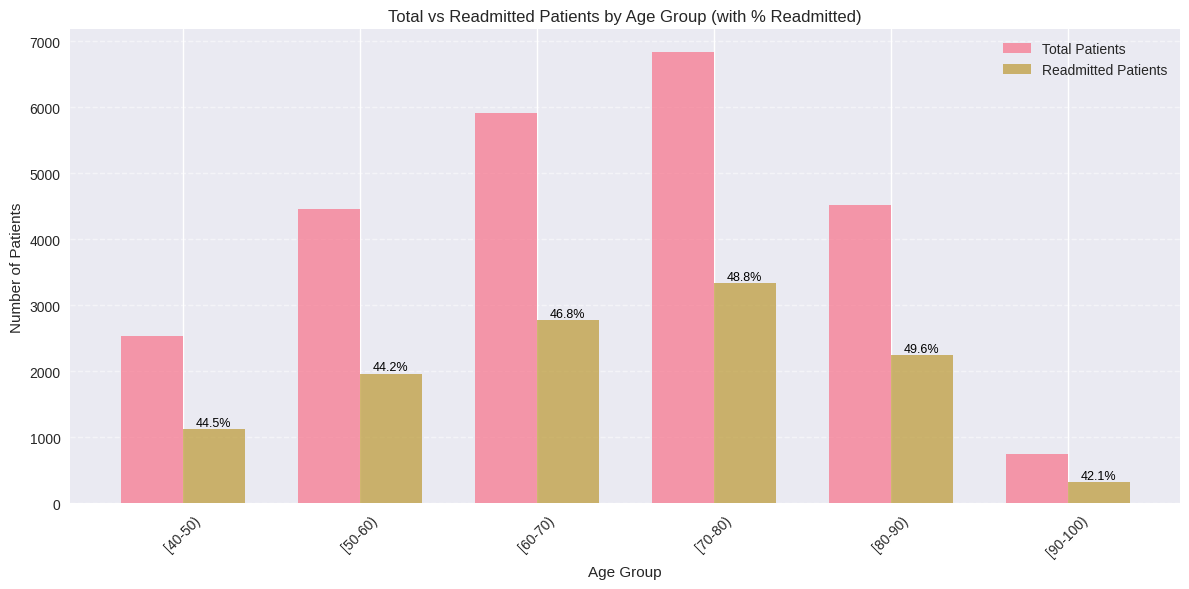


Readmission Percentage by Age Group:
[40-50): 44.5%
[50-60): 44.2%
[60-70): 46.8%
[70-80): 48.8%
[80-90): 49.6%
[90-100): 42.1%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter readmitted patients
readmitted_df = df_data[df_data['readmitted'] == 'yes']

# Total and readmitted patients per age group
total_by_age = df_data['age'].value_counts().sort_index()
readmitted_by_age = readmitted_df['age'].value_counts().sort_index()

# Consistent age group order
age_groups = sorted(df_data['age'].unique())
total_values = [total_by_age.get(age, 0) for age in age_groups]
readmitted_values = [readmitted_by_age.get(age, 0) for age in age_groups]

# Calculate % of total & % of readmission per group
total_proportions = [round((t / sum(total_values)) * 100, 1) if sum(total_values) > 0 else 0 for t in total_values]
readmit_proportions = [round((r / t) * 100, 1) if t > 0 else 0 for r, t in zip(readmitted_values, total_values)]

# Plotting
x = np.arange(len(age_groups))
bar_width = 0.35
plt.figure(figsize=(12, 6))

# Total and Readmitted bar plots
bars1 = plt.bar(x - bar_width/2, total_values, width=bar_width, label='Total Patients', color='#7FB3D5')
bars2 = plt.bar(x + bar_width/2, readmitted_values, width=bar_width, label='Readmitted Patients', color='#EC7063')

# Add counts + % inside/above bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Total count inside
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2,
             f'{total_values[i]}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    # Total percentage above
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 20,
             f'{total_proportions[i]}%', ha='center', fontsize=9, color='black')

    # Readmitted count inside
    plt.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height()/2,
             f'{readmitted_values[i]}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    # Readmitted percentage above
    plt.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 20,
             f'{readmit_proportions[i]}%', ha='center', fontsize=9, color='black')

# Final formatting
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Total vs Readmitted Patients by Age Group (Counts and %)')
plt.xticks(x, age_groups, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Print as table
print("\nReadmission % by Age Group:")
for age, percent in zip(age_groups, readmit_proportions):
    print(f"{age}: {percent}%")

In [ ]:
def get_pie_data(series, top_n=6):
    counts = series.value_counts()
    top = counts[:top_n]
    others = counts[top_n:].sum()
    final = pd.concat([top, pd.Series({'Others': others})])
    return final

# Columns to plot
columns = ['diag_1', 'diag_2', 'diag_3', 'medical_specialty']
titles = ['Diagnosis 1', 'Diagnosis 2', 'Diagnosis 3', 'Medical Specialty']
pie_data = [get_pie_data(df[col]) for col in columns]

# Plot in a 2x2 matrix layout with spacing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    data = pie_data[i]

    # Use tab20 colormap for distinct, readable colors
    cmap = plt.cm.get_cmap("tab20")
    colors = [cmap(j) for j in range(len(data))]

    wedges, texts, autotexts = ax.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 10, 'color': 'black'},
        labeldistance=1.1,
        pctdistance=0.7
    )

    # Improve label readability
    for text in texts:
        text.set_fontsize(9)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(9)

    ax.set_title(titles[i], fontsize=12, y=1.05)
    ax.axis('equal')

plt.tight_layout()
plt.show()


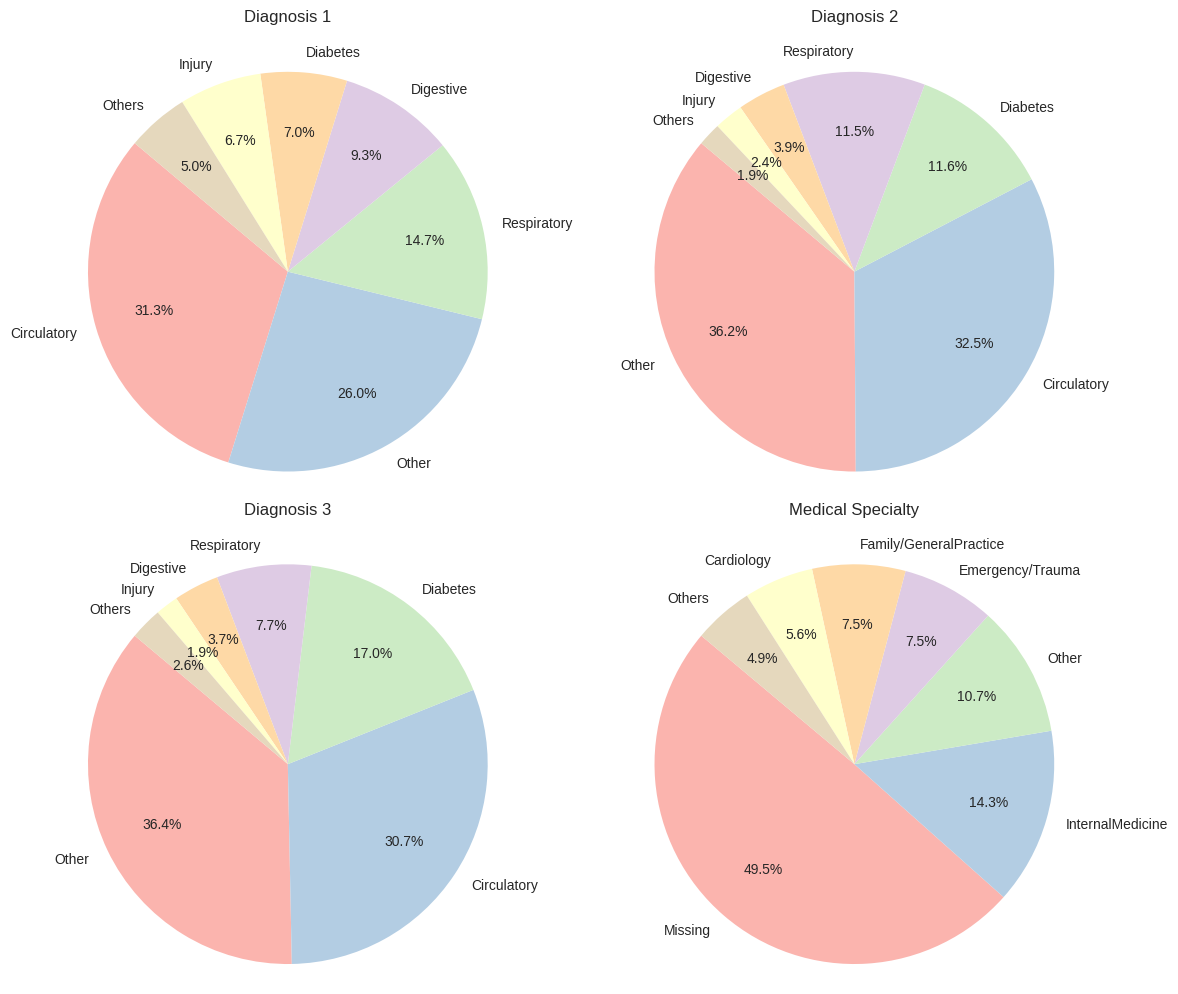

In [ ]:
def get_pie_data(series, top_n=6):
    counts = series.value_counts()
    top = counts[:top_n]
    others = counts[top_n:].sum()
    final = pd.concat([top, pd.Series({'Others': others})])
    return final

# Columns to plot
columns = ['diag_1', 'diag_2', 'diag_3', 'medical_specialty']
titles = ['Diagnosis 1', 'Diagnosis 2', 'Diagnosis 3', 'Medical Specialty']
pie_data = [get_pie_data(df[col]) for col in columns]

# Plot in a 2x2 matrix layout with spacing
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    data = pie_data[i]
    colors = plt.cm.Pastel1(range(len(data)))

    wedges, texts, autotexts = ax.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 10},
        labeldistance=1.1,
        pctdistance=0.7
    )

    ax.set_title(titles[i], fontsize=12, y=1.05)
    ax.axis('equal')

plt.tight_layout()
plt.show()

Inference Summary:
1. Diagnosis 1 is dominated by a few common illnesses — likely chronic or high-risk conditions.
2. Diagnosis 2 shows a more diverse set of secondary conditions, reflecting comorbidities."
3. Diagnosis 3 is highly fragmented, indicating a wide variety of less common additional diagnoses.
4. Circulatory and “Other” are the most common diagnoses in all three charts.
5. Less common issues (like injuries and digestive problems) appear less in secondary and third diagnoses.
6. Diabetes becomes more common in later diagnoses.
7. Almost half of the medical specialty information is missing.
8. Internal medicine is the top specialty among those reported.
9. Most patients have complex or overlapping health issues.

Overall:
The data shows strong patterns in primary diagnoses and specialties, but high variability in secondary/tertiary conditions — highlighting the need for personalized care planning.

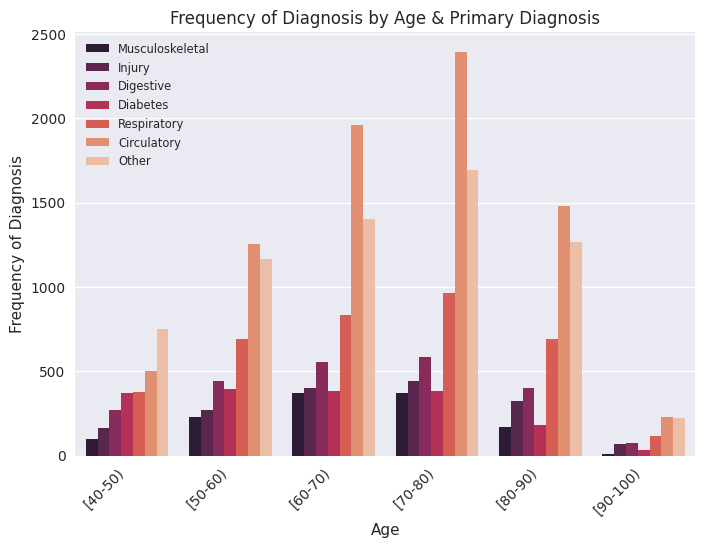

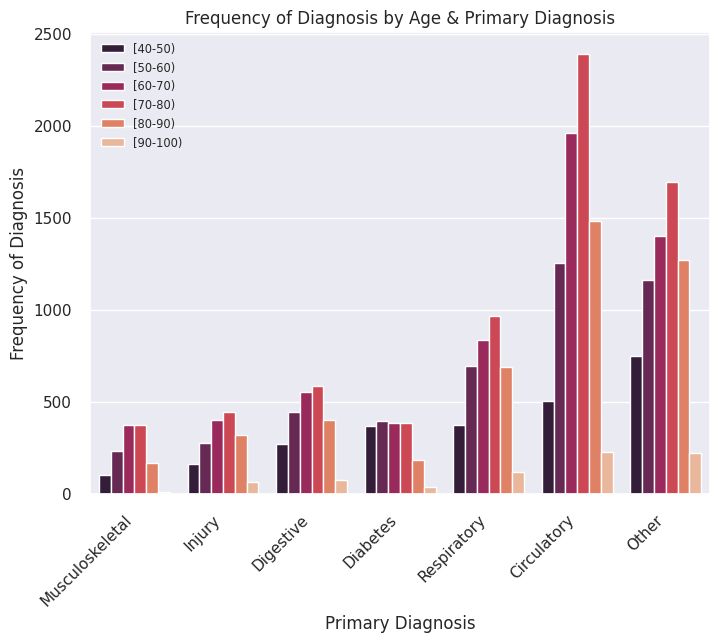

In [ ]:
groupings = [['age',True,'Age','Primary Diagnosis'],
             ['diag_2',False,'Primary Diagnosis','Age']]

for i in groupings:
    df_chart = df.groupby(['age','diag_1']).agg({'diag_2':'count'}).reset_index().sort_values(i[0],ascending=i[1])
    df_chart = df_chart.rename(columns={'age': 'Age',
                                        'diag_1':'Primary Diagnosis',
                                        'diag_2':'Frequency'}).sort_values(by=['Age','Frequency'])
    df_chart = df_chart[df_chart['Primary Diagnosis'] != 'Missing']

    chart = sns.barplot(data=df_chart,x=i[2],y="Frequency",hue=i[3],palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper left',fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Frequency of Diagnosis')
    plt.title("Frequency of Diagnosis by Age & Primary Diagnosis")
    plt.show()

Respiratory disease is also seen most in 50+ age group.

Relationship between Diabetes Diagnosis and Readmission:

Analyzing diag_1 vs Readmitted:
readmitted
no     810
yes    937
Name: Diabetes, dtype: int64
  Readmission rate for Diabetes in diag_1: 0.54


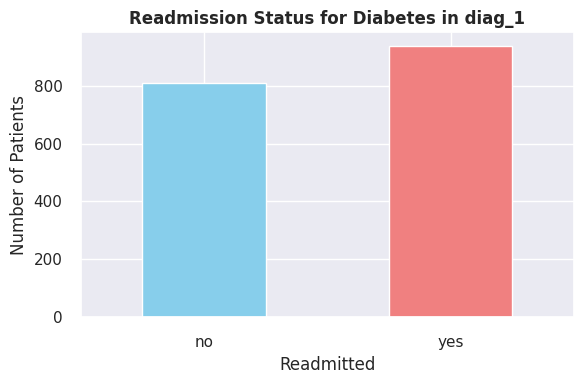


Analyzing diag_2 vs Readmitted:
readmitted
no     1623
yes    1283
Name: Diabetes, dtype: int64
  Readmission rate for Diabetes in diag_2: 0.44


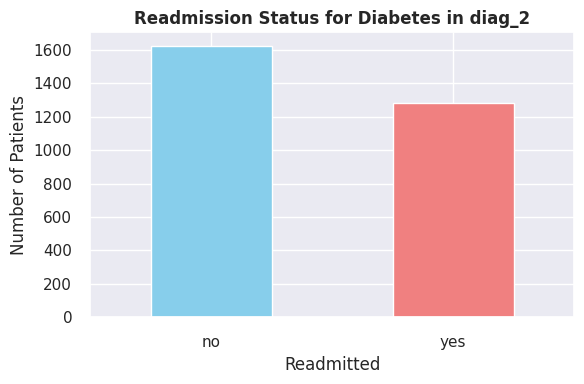


Analyzing diag_3 vs Readmitted:
readmitted
no     2314
yes    1947
Name: Diabetes, dtype: int64
  Readmission rate for Diabetes in diag_3: 0.46


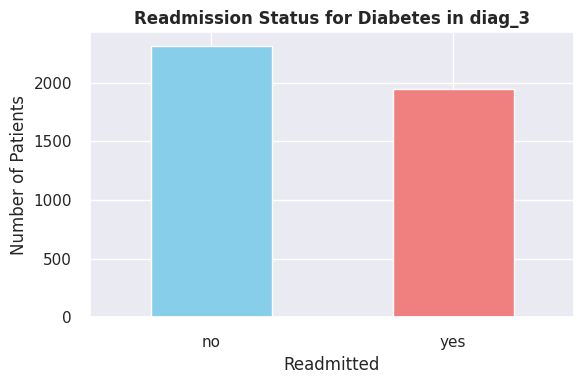


Relationship between Change in Medication and Readmission:
readmitted    no   yes
change                
no          7420  6077
yes         5826  5677


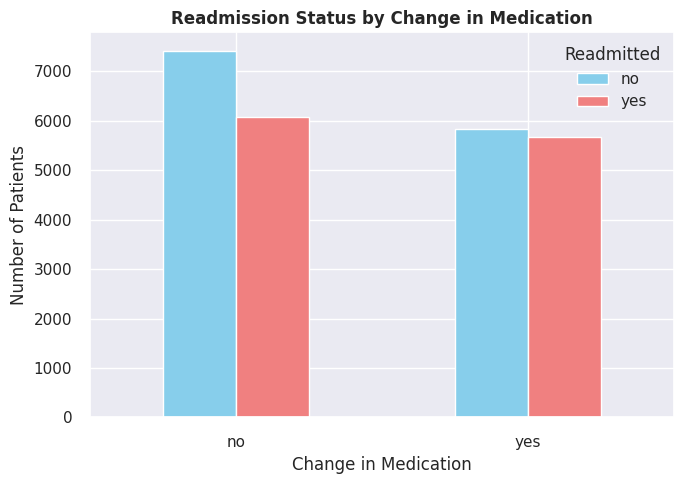


Relationship between Diabetes Medication and Readmission:
readmitted      no   yes
diabetes_med            
no            3385  2387
yes           9861  9367


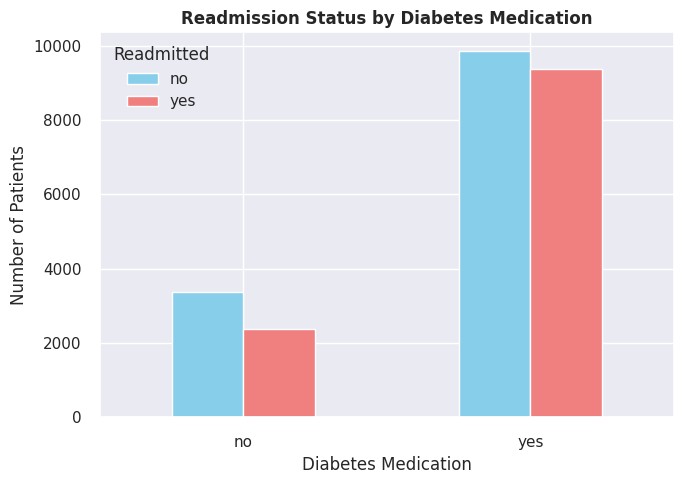

In [ ]:
# Analyze the relationship between diabetes-related factors and readmission

# 1. Relationship between Diagnosis (Diabetes) and Readmission
diagnosis_cols = ['diag_1', 'diag_2', 'diag_3']

print("Relationship between Diabetes Diagnosis and Readmission:")
for diag_col in diagnosis_cols:
    if diag_col in df.columns:
        print(f"\nAnalyzing {diag_col} vs Readmitted:")
        # Create a crosstab of the diagnosis and readmission
        crosstab_df = pd.crosstab(df[diag_col], df['readmitted'])

        # Select only the row for 'Diabetes' if it exists
        if 'Diabetes' in crosstab_df.index:
            diabetes_readmission = crosstab_df.loc['Diabetes']
            print(diabetes_readmission)

            # Calculate readmission rate for Diabetes diagnosis
            total_diabetes = diabetes_readmission.sum()
            if total_diabetes > 0:
                readmission_rate = diabetes_readmission['yes'] / total_diabetes
                print(f"  Readmission rate for Diabetes in {diag_col}: {readmission_rate:.2f}")

            # Visualize the distribution of readmission for Diabetes diagnosis
            if not diabetes_readmission.empty:
                diabetes_readmission.plot(kind='bar', figsize=(6, 4), color=['skyblue', 'lightcoral'])
                plt.title(f'Readmission Status for Diabetes in {diag_col}', fontweight='bold')
                plt.xlabel('Readmitted')
                plt.ylabel('Number of Patients')
                plt.xticks(rotation=0)
                plt.tight_layout()
                plt.show()
        else:
            print(f"  'Diabetes' category not found in {diag_col}")
    else:
        print(f"  Column '{diag_col}' not found in DataFrame.")


# 2. Relationship between Change in Medication and Readmission
if 'change' in df.columns:
    print("\nRelationship between Change in Medication and Readmission:")
    crosstab_change = pd.crosstab(df['change'], df['readmitted'])
    print(crosstab_change)

    # Visualize the distribution of readmission by change in medication
    crosstab_change.plot(kind='bar', stacked=False, figsize=(7, 5), color=['skyblue', 'lightcoral'])
    plt.title('Readmission Status by Change in Medication', fontweight='bold')
    plt.xlabel('Change in Medication')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=0)
    plt.legend(title='Readmitted')
    plt.tight_layout()
    plt.show()
else:
    print("\nColumn 'change' not found in DataFrame.")


# 3. Relationship between Diabetes Medication and Readmission
if 'diabetes_med' in df.columns:
    print("\nRelationship between Diabetes Medication and Readmission:")
    crosstab_med = pd.crosstab(df['diabetes_med'], df['readmitted'])
    print(crosstab_med)

    # Visualize the distribution of readmission by diabetes medication
    crosstab_med.plot(kind='bar', stacked=False, figsize=(7, 5), color=['skyblue', 'lightcoral'])
    plt.title('Readmission Status by Diabetes Medication', fontweight='bold')
    plt.xlabel('Diabetes Medication')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=0)
    plt.legend(title='Readmitted')
    plt.tight_layout()
    plt.show()
else:
    print("\nColumn 'diabetes_med' not found in DataFrame.")

Inference : The diagnosis result which is diabetes does not increase the readmission rate directly but the other two graphs that is the change in medication and prescibed diabetes medication increases the readmission rates.

In [ ]:
# Assess the relationship between 'change' and 'diabetes_med'
print("Relationship between 'change' and 'diabetes_med':")

if 'change' in df.columns and 'diabetes_med' in df.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df['change'], df['diabetes_med'])
    print(contingency_table)

    # For a more formal check of association, a Chi-square test could be performed,
    # but the contingency table itself gives a good visual indication.
else:
    print("Columns 'change' or 'diabetes_med' not found in DataFrame.")

Relationship between 'change' and 'diabetes_med':
diabetes_med    no    yes
change                   
no            5772   7725
yes              0  11503


Inference : change in diabetes medication and prescribed diabetes medication have high association with each other

In [ ]:
zero_check_cols = ['n_procedures', 'n_inpatient', 'n_outpatient', 'n_emergency']

print("Number of zero values in selected columns:")
for col in zero_check_cols:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        print(f"- {col}: {zero_count}")
    else:
        print(f"- Column '{col}' not found in DataFrame.")

Number of zero values in selected columns:
- n_procedures: 11409
- n_inpatient: 16537
- n_outpatient: 20859
- n_emergency: 22272


# **STEP : 4 DATA QUALITY ASSESSMENT**

In [ ]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f" DUPLICATE ROWS: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
    print("  Consider removing duplicate rows")
else:
    print(" No duplicate rows found")

 DUPLICATE ROWS: 0
 No duplicate rows found


In [ ]:
# Data consistency checks
print(f"\n DATA CONSISTENCY CHECKS:")

# Check for negative values in columns that shouldn't have them
negative_checks = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications']
for col in negative_checks:
    if col in df.columns:
        # Convert to numeric if possible (non-numeric -> NaN)
        col_numeric = pd.to_numeric(df[col], errors='coerce')
        negative_count = (col_numeric < 0).sum()
        print(f"{col}: {negative_count} negative values")



 DATA CONSISTENCY CHECKS:
age: 0 negative values
time_in_hospital: 0 negative values
n_lab_procedures: 0 negative values
n_procedures: 0 negative values
n_medications: 0 negative values


In [ ]:
# Check for unrealistic values
print(f"\n UNREALISTIC VALUES CHECK:")

if 'age' in df.columns:
    age_numeric = pd.to_numeric(df['age'], errors='coerce')  # convert safely
    age_issues = age_numeric[(age_numeric < 0) | (age_numeric > 120)].count()
    print(f"Unrealistic ages (< 0 or > 120): {age_issues}")

if 'time_in_hospital' in df.columns:
    time_numeric = pd.to_numeric(df['time_in_hospital'], errors='coerce')
    long_stay = time_numeric[time_numeric > 30].count()
    print(f"Very long hospital stays (> 30 days): {long_stay}")



 UNREALISTIC VALUES CHECK:
Unrealistic ages (< 0 or > 120): 0
Very long hospital stays (> 30 days): 0


# **STEP 5: TARGET VARIABLE ANALYSIS**

In [ ]:
# Analyze the target variable 'readmitted'
print(" TARGET VARIABLE: 'readmitted'")
print(f"Unique values: {df['readmitted'].unique()}")
print(f"Value counts:")
target_counts = df['readmitted'].value_counts()
print(target_counts)

 TARGET VARIABLE: 'readmitted'
Unique values: ['no' 'yes']
Value counts:
readmitted
no     13246
yes    11754
Name: count, dtype: int64


In [ ]:
# Calculate percentages
target_percentages = df['readmitted'].value_counts(normalize=True) * 100
print(f"\nPercentages:")
for value, percentage in target_percentages.items():
    print(f"{value}: {percentage:.2f}%")


Percentages:
no: 52.98%
yes: 47.02%


In [ ]:
# Check for class imbalance
imbalance_ratio = target_counts.min() / target_counts.max()
print(f"\n CLASS IMBALANCE ANALYSIS:")
print(f"Imbalance Ratio: {imbalance_ratio:.3f}")
if imbalance_ratio < 0.2:
    print(" Dataset is imbalanced. Consider using techniques like SMOTE, class weights, or stratified sampling.")
else:
    print(" Dataset is relatively balanced.")


 CLASS IMBALANCE ANALYSIS:
Imbalance Ratio: 0.887
 Dataset is relatively balanced.


# **STEP 6: COMPREHENSIVE MISSING DATA ANALYSIS**

In [ ]:
# Calculate missing data statistics
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})############

In [ ]:
# Count occurrences of the string "Missing" in the 'medical_specialty' column
missing_medical_specialty_count = (df['medical_specialty'] == 'Missing').sum()
print(f"Number of 'Missing' values in 'medical_specialty' column: {missing_medical_specialty_count}")

Number of 'Missing' values in 'medical_specialty' column: 12382


we have large case of missing values in medical speciality column so we may have to drop the column , before doing that lets check if it affects the readmission rate

Readmission Rate by Medical Specialty:
readmitted                no   yes  Readmission_Rate
medical_specialty                                   
Family/GeneralPractice   950   932          0.495218
Emergency/Trauma         954   931          0.493899
Missing                 6326  6056          0.489097
Cardiology               775   634          0.449965
InternalMedicine        1969  1596          0.447686
Other                   1559  1105          0.414790
Surgery                  713   500          0.412201


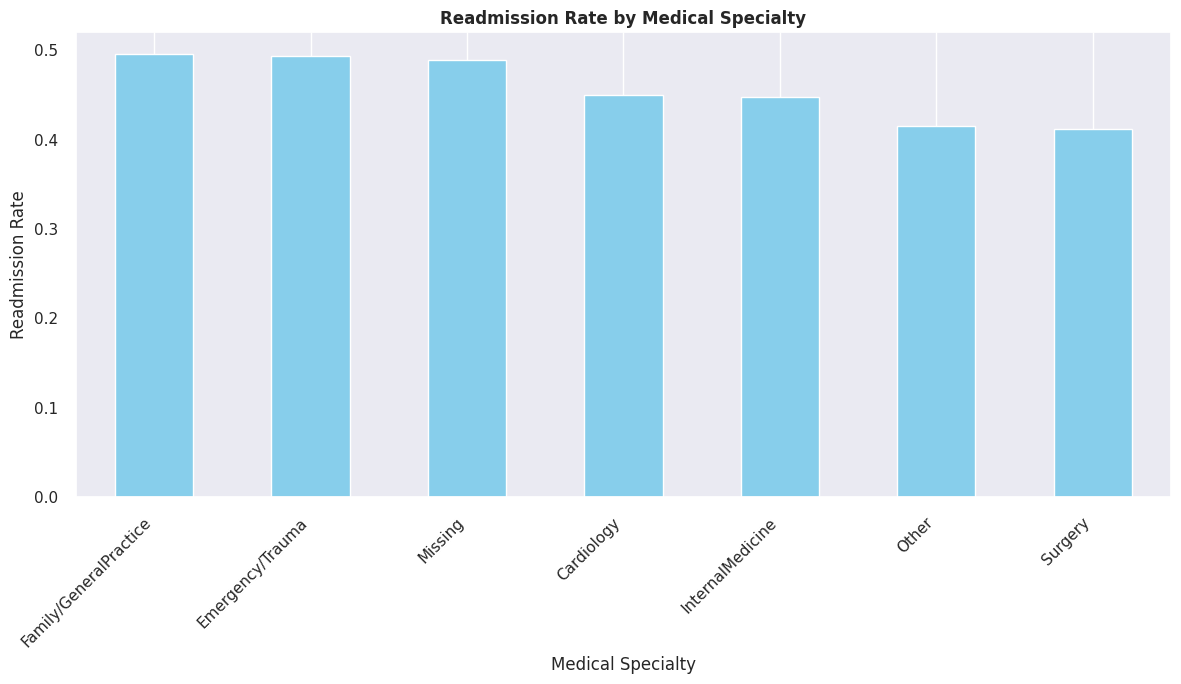

In [ ]:
# Analyze readmission rate by medical specialty
print("Readmission Rate by Medical Specialty:")

if 'medical_specialty' in df.columns and 'readmitted' in df.columns:
    # Create a crosstab of medical_specialty and readmitted
    crosstab_ms_readmitted = pd.crosstab(df['medical_specialty'], df['readmitted'])

    # Calculate the readmission rate for each medical specialty
    crosstab_ms_readmitted['Readmission_Rate'] = crosstab_ms_readmitted['yes'] / (crosstab_ms_readmitted['no'] + crosstab_ms_readmitted['yes'])

    # Sort by readmission rate for better visualization
    crosstab_ms_readmitted_sorted = crosstab_ms_readmitted.sort_values('Readmission_Rate', ascending=False)

    print(crosstab_ms_readmitted_sorted)

    # Visualize the readmission rates
    plt.figure(figsize=(12, 7))
    crosstab_ms_readmitted_sorted['Readmission_Rate'].plot(kind='bar', color='skyblue')
    plt.xlabel('Medical Specialty')
    plt.ylabel('Readmission Rate')
    plt.title('Readmission Rate by Medical Specialty', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

else:
    print("Columns 'medical_specialty' or 'readmitted' not found in DataFrame.")

As the medical speciality field has some potentially useful information we can handle the missing values by one hot encoding in further steps.

# **STEP 7: NUMERICAL FEATURES ANALYSIS**

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f" NUMERICAL COLUMNS: {numerical_cols}")

 NUMERICAL COLUMNS: ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']


In [ ]:
if numerical_cols:
    # Statistical summary for numerical columns
    print(f"\n STATISTICAL SUMMARY:")
    print(df[numerical_cols].describe())

    # Skewness analysis
    print(f"\n SKEWNESS ANALYSIS:")
    skewness_data = []
    for col in numerical_cols:
        skew_val = stats.skew(df[col].dropna())
        skewness_data.append({
            'Column': col,
            'Skewness': skew_val,
            'Interpretation': 'Highly Right Skewed' if skew_val > 1
                           else 'Moderately Right Skewed' if skew_val > 0.5
                           else 'Symmetric' if -0.5 <= skew_val <= 0.5
                           else 'Moderately Left Skewed' if skew_val > -1
                           else 'Highly Left Skewed'
        })

    skewness_df = pd.DataFrame(skewness_data)
    print(skewness_df)


 STATISTICAL SUMMARY:
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%       

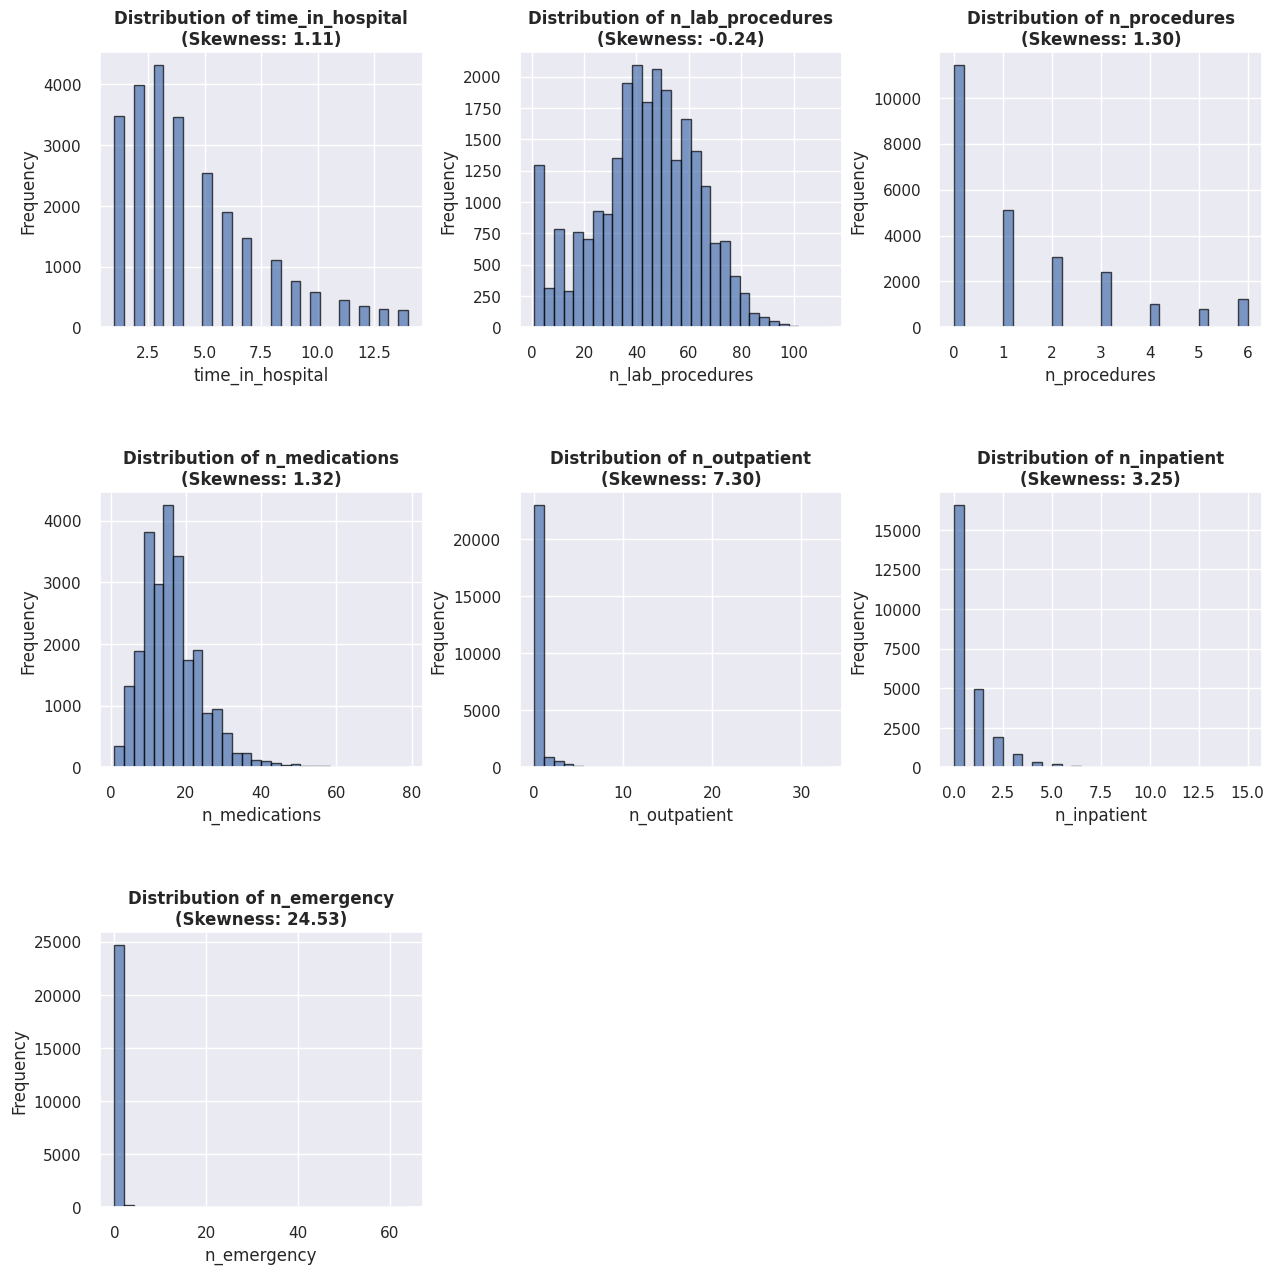

In [ ]:
# Visualize distributions of numerical features
n_cols = min(3, len(numerical_cols))
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

# Flatten axes for easy indexing
if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(
        f'Distribution of {col}\n(Skewness: {stats.skew(df[col].dropna()):.2f})',
        fontweight='bold'
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove unused axes (extra empty plots)
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.show()


Number of emergency visits is highly skewed here.

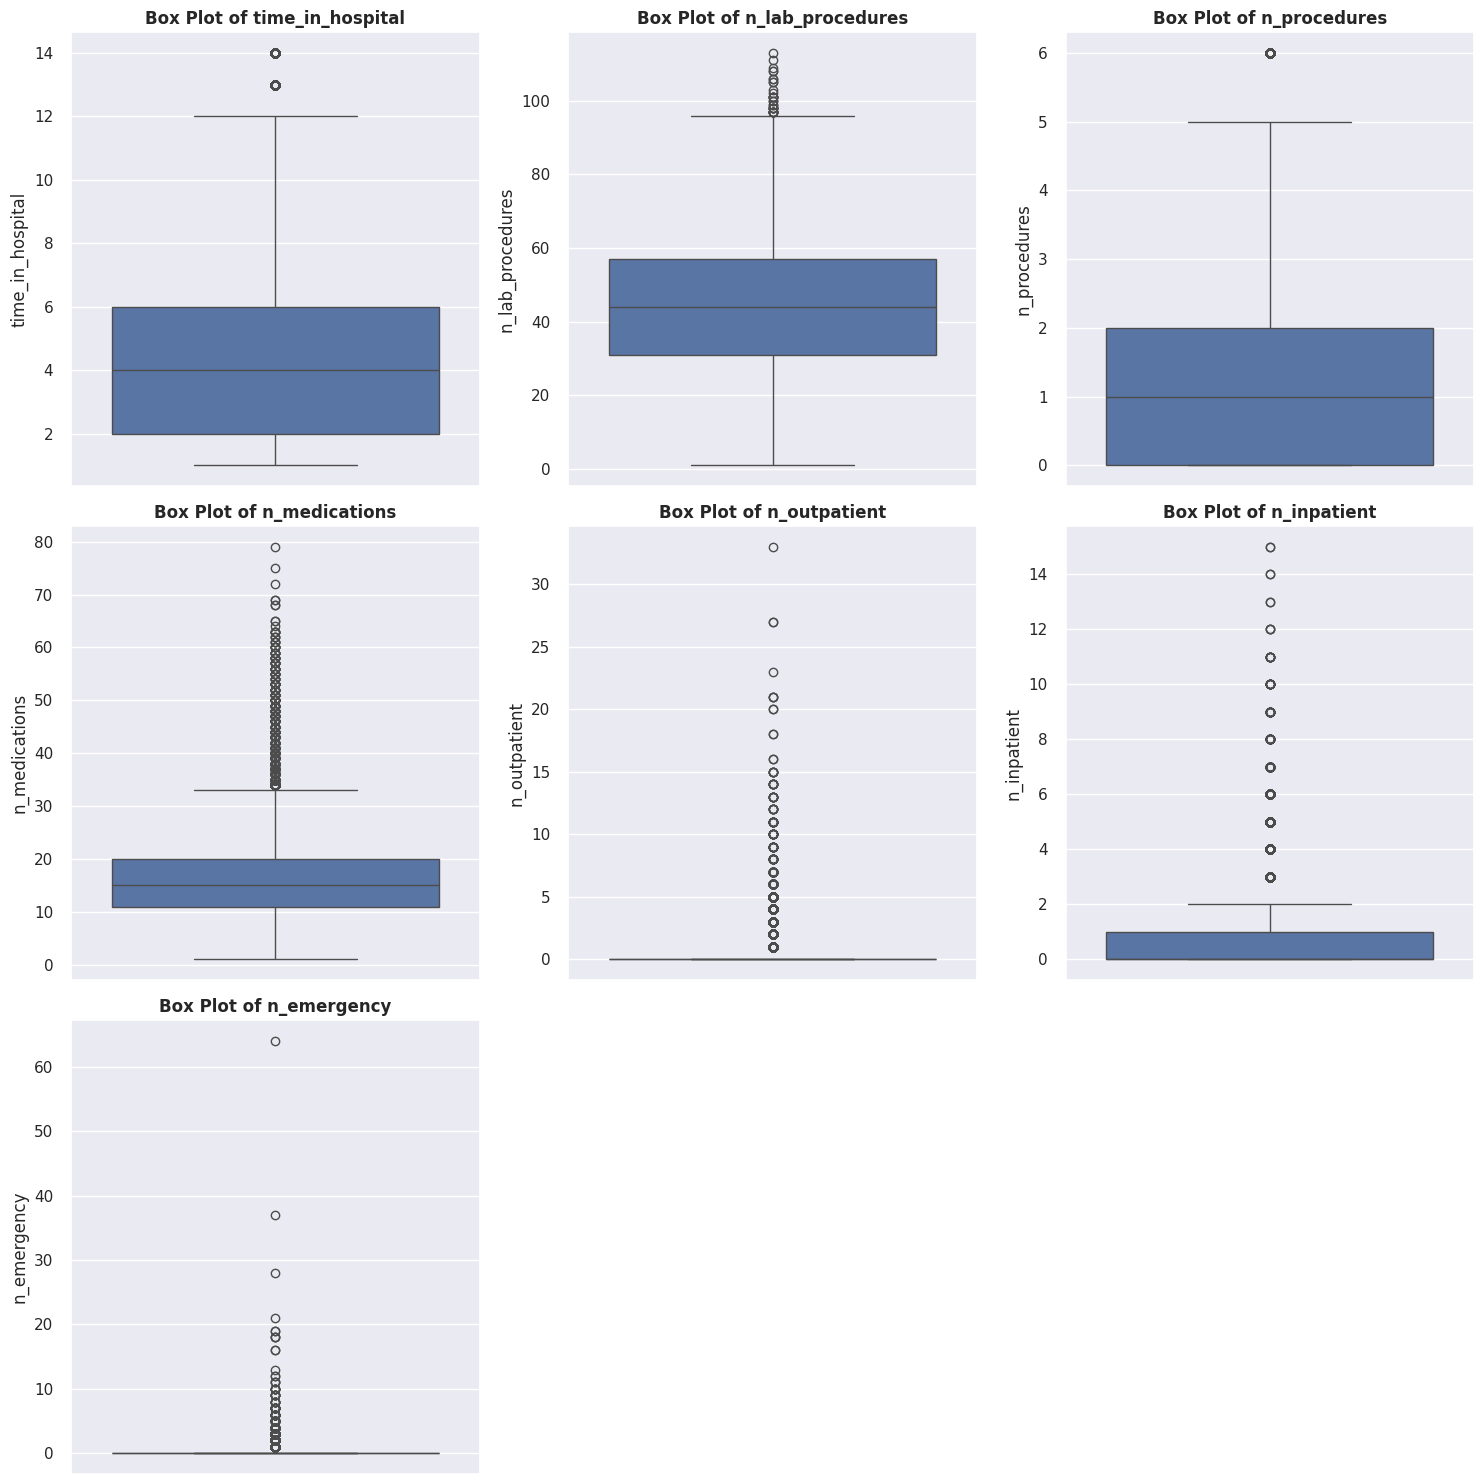

In [ ]:
# Box plots for outlier detection
if len(numerical_cols) > 1:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.boxplot(y=df[col], ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}', fontweight='bold')

    # Remove unused subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

    plt.tight_layout()
    plt.show()


**Inference : Both the number of outpatient vistis and emergency vists seems to have large outliers as the box collapses into a line at zero because IQR calculation also results in zero because most values in this column are zero, the other data points with one or more visits are considered outliers and are plotted as circles there.**

In [ ]:
# Outlier detection using IQR method
print(f"\n OUTLIER DETECTION (IQR Method):")
outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': f"{outlier_percentage:.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)


 OUTLIER DETECTION (IQR Method):
             Column  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound
0  time_in_hospital            580              2.32%       -4.00       12.00
1  n_lab_procedures             33              0.13%       -8.00       96.00
2      n_procedures           1227              4.91%       -3.00        5.00
3     n_medications            844              3.38%       -2.50       33.50
4      n_outpatient           4141             16.56%        0.00        0.00
5       n_inpatient           1628              6.51%       -1.50        2.50
6       n_emergency           2728             10.91%        0.00        0.00


In [ ]:
# Clear outliers with IQR capping using the clip method
cols_to_cap = ['n_outpatient','n_inpatient','n_emergency']

if 'df' in locals():
    print("Clearing outliers with IQR capping using .clip() method:")
    for col in cols_to_cap:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower=lower, upper=upper)
            print(f" Applied capping to '{col}'.")
        else:
            print(f" Column '{col}' not found in df_processed.")

    # to see the effect of capping on these columns.
    # print("\nSummary statistics after capping:")
    # display(df_processed[cols_to_cap].describe())

else:
    print("DataFrame 'df_processed' not found. Please ensure it is created before running this cell.")

Clearing outliers with IQR capping using .clip() method:
 Applied capping to 'n_outpatient'.
 Applied capping to 'n_inpatient'.
 Applied capping to 'n_emergency'.


In [ ]:
numerical_cols = ['n_outpatient','n_inpatient','n_emergency']
print(f"\n OUTLIER DETECTION (IQR Method):")
outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Column': col,
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': f"{outlier_percentage:.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)


 OUTLIER DETECTION (IQR Method):
         Column  Outlier_Count Outlier_Percentage Lower_Bound Upper_Bound
0  n_outpatient              0              0.00%        0.00        0.00
1   n_inpatient              0              0.00%       -1.50        2.50
2   n_emergency              0              0.00%        0.00        0.00


Removed the outliers found previously with IQR

# **STEP 8: CATEGORICAL FEATURES ANALYSIS**


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Remove target variable if it's included
if 'readmitted' in categorical_cols:
    categorical_cols.remove('readmitted')
    print(f" CATEGORICAL COLUMNS: {categorical_cols}")


 CATEGORICAL COLUMNS: ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']


In [ ]:
if categorical_cols:
    # Analyze each categorical column
    categorical_analysis = []

    for col in categorical_cols:
        unique_count = df[col].nunique()
        most_frequent = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
        most_frequent_count = df[col].value_counts().iloc[0] if not df[col].empty else 0

        categorical_analysis.append({
            'Column': col,
            'Unique_Values': unique_count,
            'Most_Frequent': most_frequent,
            'Most_Frequent_Count': most_frequent_count,
            'Most_Frequent_Percentage': f"{(most_frequent_count/len(df))*100:.1f}%"
        })

    categorical_df = pd.DataFrame(categorical_analysis)
    print(f"\n CATEGORICAL FEATURES SUMMARY:")
    print(categorical_df)


 CATEGORICAL FEATURES SUMMARY:
              Column  Unique_Values Most_Frequent  Most_Frequent_Count  \
0                age              6       [70-80)                 6837   
1  medical_specialty              7       Missing                12382   
2             diag_1              8   Circulatory                 7824   
3             diag_2              8         Other                 9056   
4             diag_3              8         Other                 9107   
5       glucose_test              3            no                23625   
6            A1Ctest              3            no                20938   
7             change              2            no                13497   
8       diabetes_med              2           yes                19228   

  Most_Frequent_Percentage  
0                    27.3%  
1                    49.5%  
2                    31.3%  
3                    36.2%  
4                    36.4%  
5                    94.5%  
6                    83.

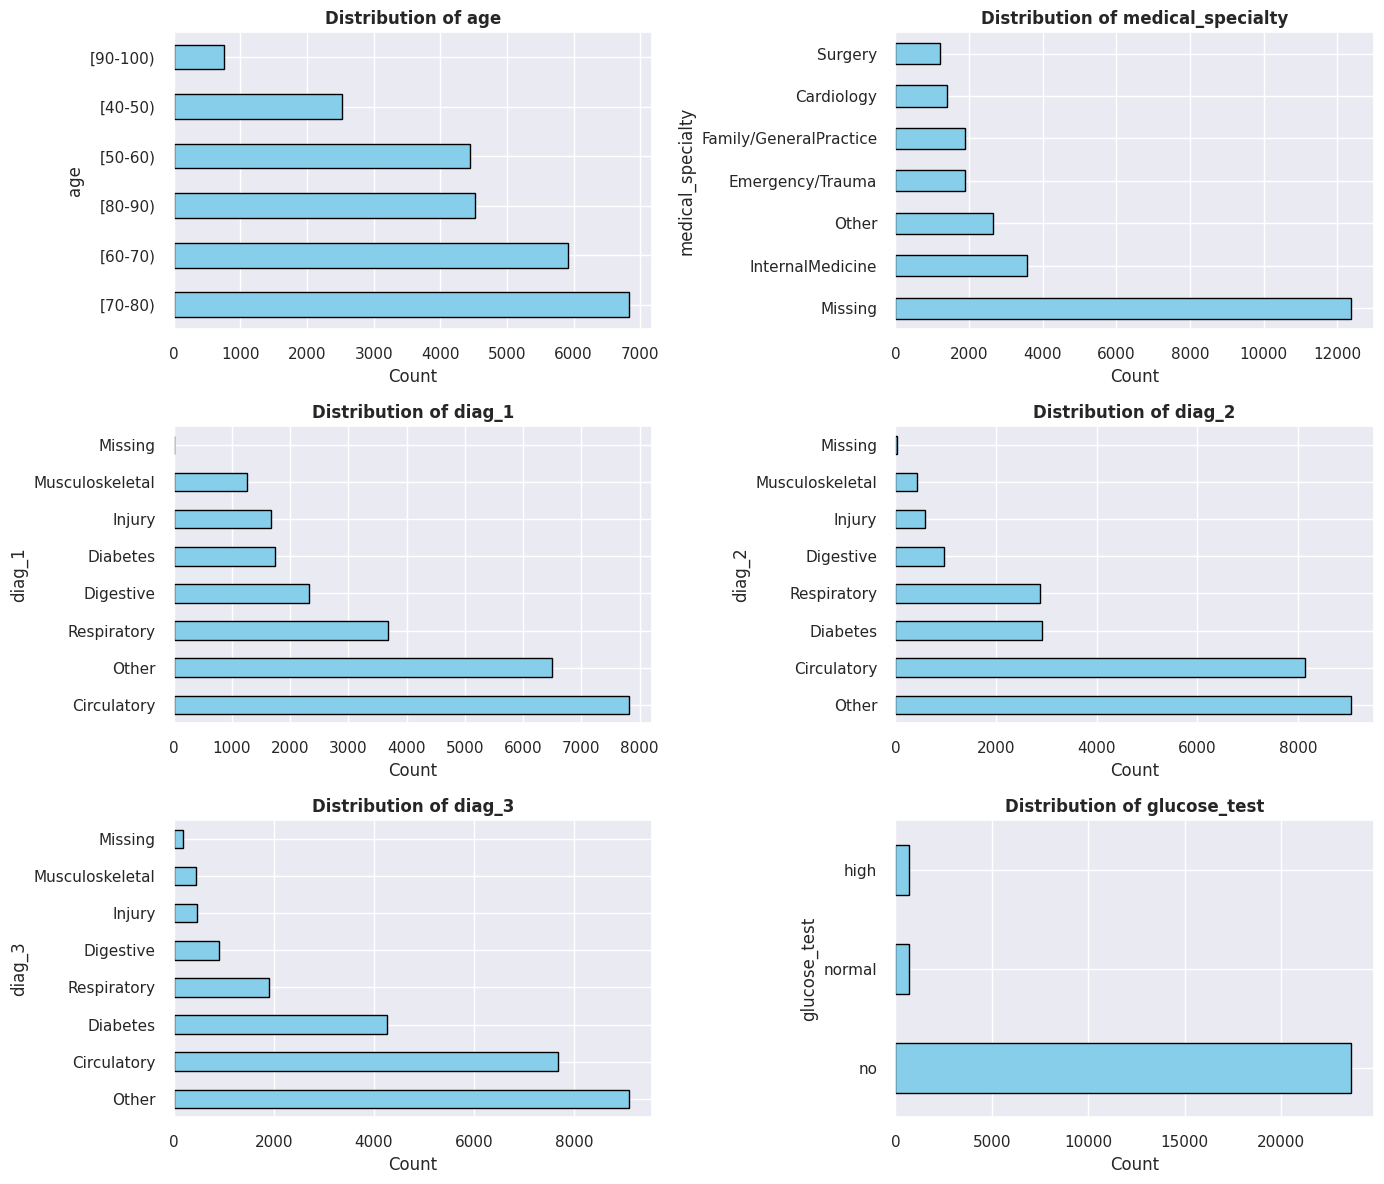

In [ ]:
import math
n_cols = 2   # 2 plots per row
n_plots = len(categorical_cols[:6])
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  # iterable

for idx, col in enumerate(categorical_cols[:6]):
    value_counts = df[col].value_counts()
    if len(value_counts) > 10: #to only display top 10 categories , if there are too many categories
        value_counts = value_counts.head(15)
        title_suffix = f" (Top 15 of {df[col].nunique()} categories)"
    else:
        title_suffix = ""

    value_counts.plot(kind='barh', color='skyblue', edgecolor='black', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}{title_suffix}', fontweight='bold')
    axes[idx].set_xlabel('Count')
    axes[idx].set_ylabel(col)

# Hide unused subplots if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **STEP 9: FEATURE RELATIONSHIPS & CORRELATIONS**


Correlation Matrix:
                  time_in_hospital  n_lab_procedures  n_procedures  \
time_in_hospital             1.000             0.328         0.179   
n_lab_procedures             0.328             1.000         0.049   
n_procedures                 0.179             0.049         1.000   
n_medications                0.449             0.272         0.369   
n_inpatient                  0.088             0.047        -0.079   

                  n_medications  n_inpatient  
time_in_hospital          0.449        0.088  
n_lab_procedures          0.272        0.047  
n_procedures              0.369       -0.079  
n_medications             1.000        0.072  
n_inpatient               0.072        1.000  



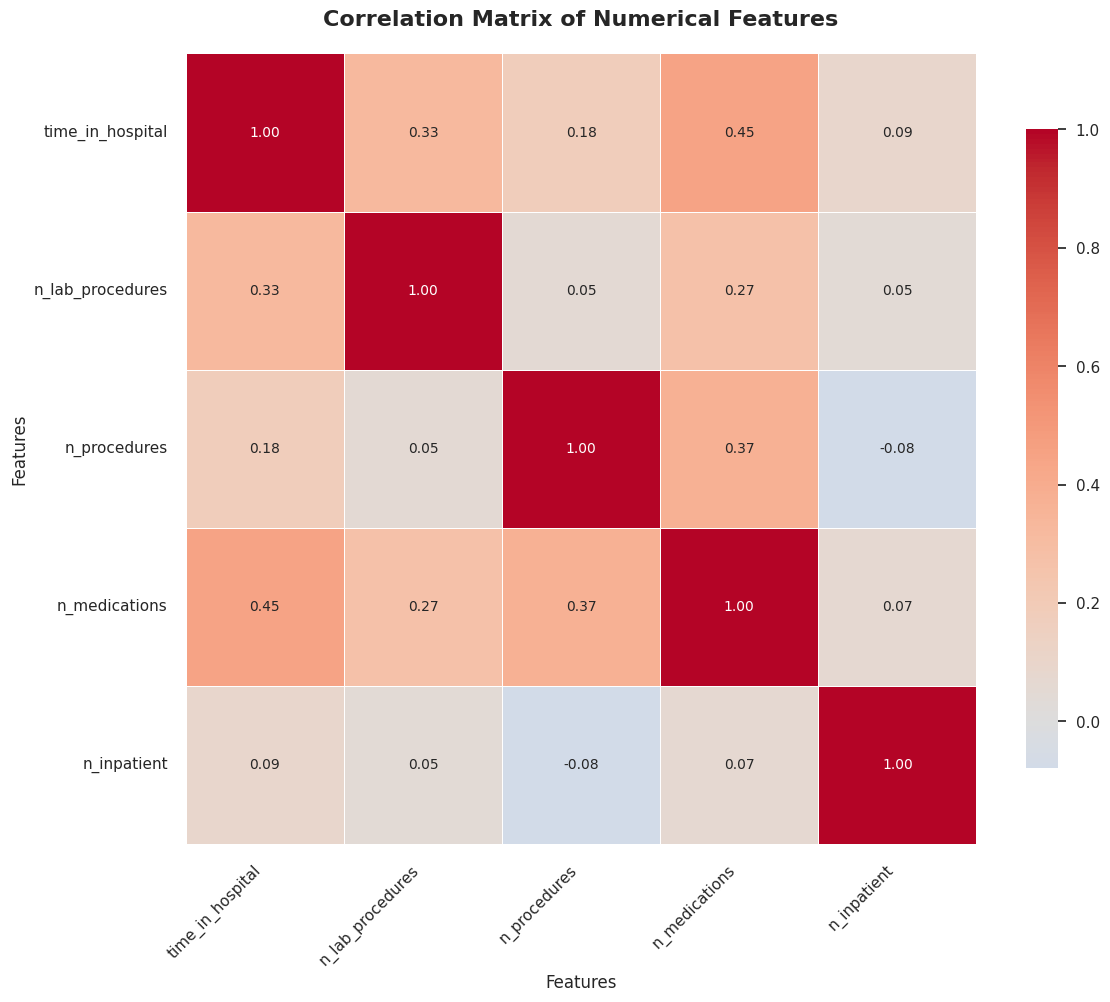

Strongest Positive Correlations (excluding diagonal):
time_in_hospital ↔ n_medications: 0.449
n_procedures ↔ n_medications: 0.369
time_in_hospital ↔ n_lab_procedures: 0.328
n_lab_procedures ↔ n_medications: 0.272
time_in_hospital ↔ n_procedures: 0.179


In [ ]:
numerical_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_inpatient']

if len(numerical_cols) > 1:
    # Calculate correlation matrix for the specified numerical features
    corr_matrix = df[numerical_cols].corr()

    # Print correlation matrix values
    print("Correlation Matrix:")
    print(corr_matrix.round(3))
    print()

    # Create the visualization
    plt.figure(figsize=(12, 10))  # Larger size for more features

    # Create heatmap without masking (show full matrix)
    sns.heatmap(corr_matrix,
                annot=True,                    # Show correlation values
                cmap='coolwarm',               # Red-blue color scheme
                center=0,                      # Center at 0
                square=True,                   # Square cells
                fmt='.2f',                     # 2 decimal places
                cbar_kws={'shrink': .8},       # Color bar settings
                linewidths=0.5,                # Grid lines
                annot_kws={'size': 10})        # Text size

    plt.title('Correlation Matrix of Numerical Features',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Find and display strongest correlations (excluding diagonal)
    print("Strongest Positive Correlations (excluding diagonal):")
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

    # Sort by absolute correlation value
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

    for var1, var2, corr_val in corr_pairs_sorted[:5]:  # Top 5 correlations
        print(f"{var1} ↔ {var2}: {corr_val:.3f}")

else:
    print("Need at least 2 numerical columns for correlation analysis")

In [ ]:
# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(f"\n HIGHLY CORRELATED FEATURES (|r| > 0.7):")
    print(high_corr_df)
    print("Consider removing one feature from each pair to reduce multicollinearity.")
else:
    print(f"\n No highly correlated features found (|r| > 0.7)")



 No highly correlated features found (|r| > 0.7)


In [ ]:
# Relationship with target variable
print(f"\n RELATIONSHIP WITH TARGET VARIABLE:")


 RELATIONSHIP WITH TARGET VARIABLE:


In [ ]:
print(f"RELATIONSHIP WITH TARGET VARIABLE:")
# For numerical features vs target
if numerical_cols:
    for col in numerical_cols:
        if col != 'readmitted':
            print(f"\n{col} vs readmitted:\n")
            groupby_stats = df.groupby('readmitted')[col].agg(['mean', 'median', 'std']).round(2)
            print(groupby_stats)

            # Statistical test (t-test for numerical vs binary target)
            if df['readmitted'].nunique() == 2:
                group1 = df[df['readmitted'] == df['readmitted'].unique()[0]][col].dropna()
                group2 = df[df['readmitted'] == df['readmitted'].unique()[1]][col].dropna()

                if len(group1) > 0 and len(group2) > 0:
                    t_stat, p_value = stats.ttest_ind(group1, group2)
                    print(f"T-test p-value: {p_value:.4f}")
                    if p_value < 0.05:
                        print("\nSignificant difference between groups")
                    else:
                        print("\nNo significant difference between groups")
                    print("-"*40)

RELATIONSHIP WITH TARGET VARIABLE:

time_in_hospital vs readmitted:

            mean  median  std
readmitted                   
no          4.33     4.0  3.0
yes         4.59     4.0  3.0
T-test p-value: 0.0000

Significant difference between groups
----------------------------------------

n_lab_procedures vs readmitted:

             mean  median    std
readmitted                      
no          42.63    44.0  20.09
yes         43.93    45.0  19.49
T-test p-value: 0.0000

Significant difference between groups
----------------------------------------

n_procedures vs readmitted:

            mean  median   std
readmitted                    
no          1.42     1.0  1.75
yes         1.27     1.0  1.68
T-test p-value: 0.0000

Significant difference between groups
----------------------------------------

n_medications vs readmitted:

             mean  median   std
readmitted                     
no          15.97    15.0  8.45
yes         16.57    16.0  7.58
T-test p-value: 0.0000


In [ ]:
# For categorical features vs target (Chi-square test)
if categorical_cols:
    print(f"CATEGORICAL FEATURES VS TARGET (Chi-square tests):")
    for col in categorical_cols:
        if col != 'readmitted':
            contingency_table = pd.crosstab(df[col], df['readmitted'])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            print(f"\n{col}:\n")
            print(f"Chi-square statistic: {chi2:.4f}")
            print(f"P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("\nSignificant association with readmission")
            else:
                print("\nNo significant association with readmission")
            print("-"*40)

CATEGORICAL FEATURES VS TARGET (Chi-square tests):

age:

Chi-square statistic: 48.7873
P-value: 0.0000

Significant association with readmission
----------------------------------------

medical_specialty:

Chi-square statistic: 85.5119
P-value: 0.0000

Significant association with readmission
----------------------------------------

diag_1:

Chi-square statistic: 84.9093
P-value: 0.0000

Significant association with readmission
----------------------------------------

diag_2:

Chi-square statistic: 33.1383
P-value: 0.0000

Significant association with readmission
----------------------------------------

diag_3:

Chi-square statistic: 45.7832
P-value: 0.0000

Significant association with readmission
----------------------------------------

glucose_test:

Chi-square statistic: 7.7532
P-value: 0.0207

Significant association with readmission
----------------------------------------

A1Ctest:

Chi-square statistic: 14.8260
P-value: 0.0006

Significant association with readmission
---

# **STEP 10: DATA CLEANING & PREPROCESSING**

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()
print(f"Created copy for preprocessing: {df_processed.shape}")

Created copy for preprocessing: (25000, 17)


In [ ]:
# Remove duplicates
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df_processed = df_processed.drop_duplicates()
    print(f" Removed {duplicate_count} duplicate rows")

print(f"\nProcessed dataset shape: {df_processed.shape}")
print(f"Missing values remaining: {df_processed.isnull().sum().sum()}")



Processed dataset shape: (25000, 17)
Missing values remaining: 0


# **STEP 11 : PIPELINE - DATA PREPROCESSING , FEATURE ENGINEERING , MODELING, EVALUATING**

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


# ==========================
# Custom Transformers
# ==========================

class AgeEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.age_mapping = {
            '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4,
            '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9
        }
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_transformed = X.copy()
        if 'age' in X_transformed.columns:
            X_transformed['age_encoded'] = X_transformed['age'].map(self.age_mapping).fillna(-1).astype(int)
            X_transformed = X_transformed.drop(columns=['age'])
        return X_transformed

class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass # No parameters needed for this transformer

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['n_visits'] = (
            X_transformed['n_inpatient'] +
            X_transformed['n_outpatient'] +
            X_transformed['n_emergency']
        )
        X_transformed['proc_med_ratio'] = (
            X_transformed['n_procedures'] / (X_transformed['n_medications'] + 1e-6)
        )
        if 'change' in X_transformed.columns:
            X_transformed = X_transformed.rename(columns={'change': 'change_in_med'})
        return X_transformed

class LabelCategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.label_encoders = {}
    def fit(self, X, y=None):
        for col in self.columns:
            if col in X.columns:
                le = LabelEncoder()
                le.fit(X[col].astype(str))
                self.label_encoders[col] = le
        return self
    def transform(self, X):
        X_transformed = X.copy()
        for col in self.columns:
            if col in self.label_encoders:
                X_transformed[col] = self.label_encoders[col].transform(X_transformed[col].astype(str))
        return X_transformed

# ==========================
# Load Dataset
# ==========================
df = pd.read_csv("/content/hospital_readmissions.csv")

# Drop medical_specialty
if 'medical_specialty' in df.columns:
    df = df.drop(columns=['medical_specialty'])

# Separate features and target
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# ==========================
# Train/Validation/Test Split (75/15/10)
# ==========================
y = y.map({'no': 0, 'yes': 1}).astype(int)

# 75% train, 25% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# from 25% temp, take 60% validation (0.25*0.6=15%), 40% test (0.25*0.4=10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42
)

print(f"Train size: {X_train.shape}, {y_train.shape}")
print(f"Validation size: {X_val.shape}, {y_val.shape}")
print(f"Test size: {X_test.shape}, {y_test.shape}")

# ==========================
# Column Definitions
# ==========================
onehot_cols = ['diag_1', 'diag_2', 'diag_3']
labelencode_cols = ['glucose_test', 'A1Ctest', 'change_in_med', 'diabetes_med']
numerical_cols = [
    'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
    'n_outpatient', 'n_inpatient', 'n_emergency',
    'n_visits', 'proc_med_ratio' # age_encoded is added by AgeEncoder later
]

# ==========================
# Preprocessing Pipeline
# ==========================
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

labelencode_pipeline = Pipeline([
    ('labelencode', LabelCategoricalEncoder(columns=labelencode_cols))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('onehot', onehot_pipeline, onehot_cols),
    ('labelencode', labelencode_pipeline, labelencode_cols)
], remainder='drop')

# ==========================
# Unified Pipeline
# ==========================
def make_pipeline(model):
    return Pipeline([
        ('age_encoder', AgeEncoder()),
        ('feature_creator', FeatureCreator()),
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

pipeline = Pipeline([
    ('age_encoder', AgeEncoder()),
    ('feature_creator', FeatureCreator()),
    ('preprocessor', preprocessor)
])

# Fit pipeline to training data
pipeline.fit(X_train, y_train)

# Get final feature names
# Get feature names from OneHotEncoder
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(onehot_cols)

# Get feature names from LabelCategoricalEncoder (the original column names are kept)
label_feature_names = labelencode_cols

# The numerical columns are the original numerical columns plus the new ones created by FeatureCreator
numerical_feature_names = numerical_cols

# The age_encoded column is added by AgeEncoder
age_encoded_feature_name = ['age_encoded']

# Combine all feature names in the correct order they appear after preprocessing
final_features = numerical_feature_names + list(ohe_feature_names) + label_feature_names + age_encoded_feature_name

# Check if the number of generated feature names matches the number of columns after transformation
transformed_columns_count = pipeline.transform(X_train).shape[1]
if len(final_features) != transformed_columns_count:
    print(f"Warning: Mismatch in feature names count. Expected {transformed_columns_count}, got {len(final_features)}.")
    # Fallback: generate generic names if count doesn't match
    final_features = [f"feature_{i}" for i in range(transformed_columns_count)]


# ==========================
# Baseline Classifiers
# ==========================
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=10, class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, random_state=42),
    "Bagging (KNN)": BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=50, random_state=42),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
}
# ==========================
# Cost-Sensitive Evaluation
# ==========================
FN_COST = 10
FP_COST = 1

def evaluate_models(models, X_train, X_val, y_train, y_val, threshold=0.4):
    results = []
    for name, model in tqdm(models.items(), desc="Evaluating Models", unit="model"):
        # Build full pipeline with this classifier
        pipe = make_pipeline(model)
        pipe.fit(X_train, y_train)

        # Get probabilities
        try:
            y_prob = pipe.predict_proba(X_val)[:, 1]
        except:
            y_prob = pipe.decision_function(X_val)

        # Thresholding
        y_pred = (y_prob >= threshold).astype(int)

        # Confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

        # Metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, zero_division=0)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        roc_auc = roc_auc_score(y_val, y_prob)
        cost = FN_COST * fn + FP_COST * fp

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "Specificity": specificity,
            "F1": f1,
            "ROC-AUC": roc_auc,
            "TP": tp,
            "TN": tn,
            "FP": fp,
            "FN": fn,
            "Cost": cost
        })
    return pd.DataFrame(results).sort_values(by="Cost").reset_index(drop=True)



Train size: (18750, 15), (18750,)
Validation size: (3750, 15), (3750,)
Test size: (2500, 15), (2500,)


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
results_df = evaluate_models(models, X_train, X_val, y_train, y_val)

# Multiply selected metric columns by 100 and round
percentage_cols = ["Accuracy", "Precision", "Recall", "Specificity", "F1", "ROC-AUC"]
results_df[percentage_cols] = results_df[percentage_cols].apply(lambda x: (x * 100).round(2))

print("\nBaseline Model Results (Validation Set):\n")
print(results_df.to_string(index=False))

Evaluating Models:   0%|          | 0/7 [00:00<?, ?model/s]/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
Evaluating Models:  14%|█▍        | 1/7 [00:01<00:07,  1.26s/model]/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
Evaluating Models:  29%|██▊       | 2/7 [00:10<00:29,  5.82s/model]/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, pr


Baseline Model Results (Validation Set):

              Model  Accuracy  Precision  Recall  Specificity    F1  ROC-AUC   TP   TN   FP  FN  Cost
        Naive Bayes     47.73      47.28   97.05         3.98 63.58    62.77 1711   79 1908  52  2428
Logistic Regression     54.05      50.65   87.75        24.16 64.23    64.52 1547  480 1507 216  3667
      Random Forest     55.71      51.79   83.83        30.75 64.02    65.18 1478  611 1376 285  4226
  Gradient Boosting     59.12      54.71   75.78        44.34 63.54    65.04 1336  881 1106 427  5376
            XGBoost     58.64      54.58   71.64        47.11 61.96    63.21 1263  936 1051 500  6051
      Bagging (KNN)     54.21      51.06   62.90        46.50 56.37    58.00 1109  924 1063 654  7603
 MLP Neural Network     54.16      51.12   57.12        51.53 53.95    56.17 1007 1024  963 756  8523


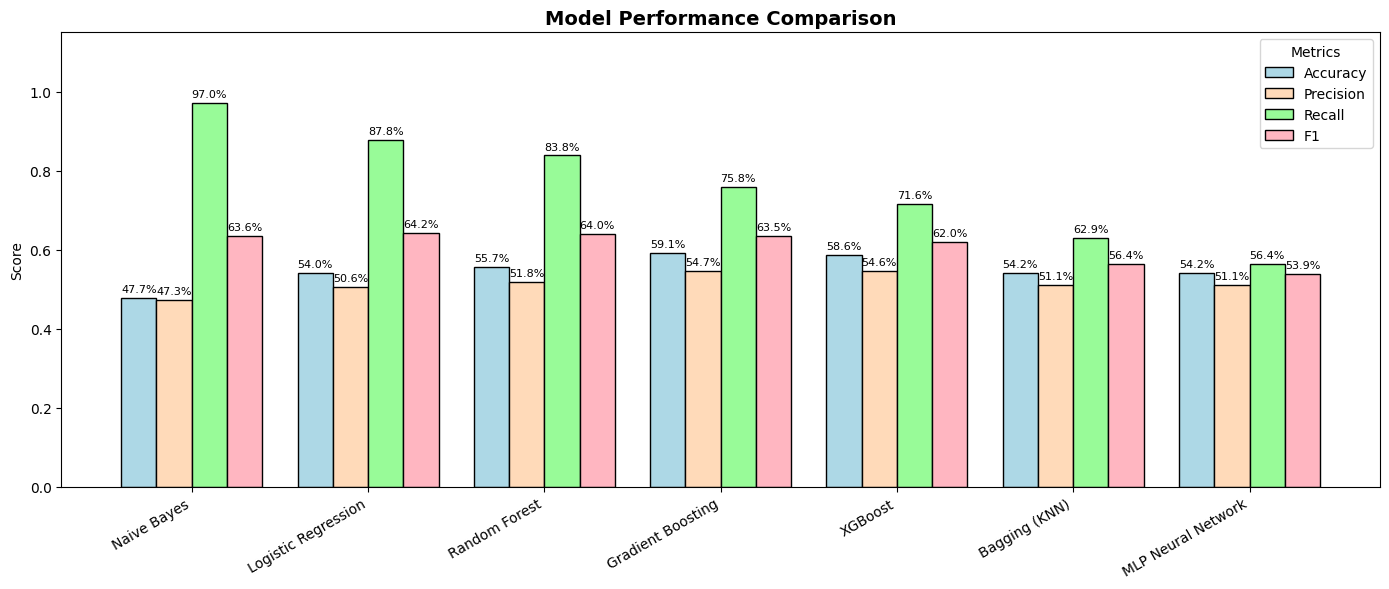

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create dataframe from your table
data = {
    "Model": [
        "Naive Bayes", "Logistic Regression", "Random Forest",
        "Gradient Boosting", "XGBoost", "Bagging (KNN)", "MLP Neural Network"
    ],
    "Accuracy": [47.73, 54.05, 55.71, 59.12, 58.64, 54.21, 54.16],
    "Precision": [47.28, 50.65, 51.79, 54.71, 54.58, 51.06, 51.12],
    "Recall": [97.05, 87.75, 83.83, 75.78, 71.64, 62.90, 56.37],
    "F1": [63.58, 64.23, 64.02, 63.54, 61.96, 56.37, 53.95]
}

df = pd.DataFrame(data)

# Step 2: Plot grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1"]
x = np.arange(len(df["Model"]))
bar_width = 0.2

# Brighter pastel colors
bright_pastels = ['#ADD8E6', '#FFDAB9', '#98FB98', '#FFB6C1']  # Light blue, peach, mint, pink

fig, ax = plt.subplots(figsize=(14, 6))

for i, metric in enumerate(metrics):
    bars = ax.bar(x + i * bar_width,
                  df[metric] / 100,
                  width=bar_width,
                  label=metric,
                  color=bright_pastels[i],
                  edgecolor='black')

    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                height + 0.01,
                f"{height * 100:.1f}%",
                ha='center', # horizontal alignment
                va='bottom', # vertical alignment
                fontsize=8) # reduced font size

# Step 3: Formatting
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(df["Model"], rotation=30, ha="right", fontsize=10)
ax.set_ylabel("Score")
ax.set_ylim(0, 1.15)
ax.set_title("Model Performance Comparison", fontsize=14, fontweight='bold')
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

# **HYPERPARAMTER TUNING & TESTTING ON TEST DATASET**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# models = {
#     "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=10, class_weight="balanced", random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, random_state=42),
#     "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
# }
# Random Forest
rf_param_grid = {
    "classifier__n_estimators": [200, 300 ],          # default=100
    "classifier__max_depth": [10, 20],              # default=None
    "classifier__min_samples_split": [2, 5],          # default=2
    "classifier__min_samples_leaf": [1, 2],            # default=1
    "classifier__max_features": ["sqrt", "log2"],   # default="sqrt"
}

# Gradient Boosting
gb_param_grid = {
    "classifier__n_estimators": [200, 300],          # default=100
    "classifier__learning_rate": [0.05, 0.01],       # default=0.1
    "classifier__max_depth": [3, 5],                   # default=3
    "classifier__subsample": [1.0, 0.8],                  # default=1.0
    "classifier__min_samples_split": [2, 5],              # default=2
}

# XGBoost
xgb_param_grid = {
    "classifier__n_estimators": [100, 200],          # default=100
    "classifier__learning_rate": [0.05, 0.01],       # default=0.1
    "classifier__max_depth": [3, 5],                   # default=6
    "classifier__subsample": [1.0, 0.8],                  # default=1.0
    "classifier__colsample_bytree": [1.0, 0.8],           # default=1.0
}

In [ ]:
tuned_results = {}

def tune_and_evaluate(model_name, model, param_grid):

    # Random Search
    random = RandomizedSearchCV(
        make_pipeline(model),
        param_distributions=param_grid,
        n_iter=10,
        cv=3,
        scoring="roc_auc",
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    random.fit(X_train, y_train)

    tuned_results[model_name] = {
        "random_best_estimator": random.best_estimator_, # Store the best estimator from Random Search
        "random_best_params": random.best_params_    # Store the best parameters from Random Search
    }

In [ ]:
tune_and_evaluate("RandomForest", RandomForestClassifier(class_weight="balanced", n_jobs=-1), rf_param_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
tune_and_evaluate("GradientBoosting", GradientBoostingClassifier(), gb_param_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
tune_and_evaluate("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_jobs=-1), xgb_param_grid)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:23:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import pandas as pd

# Create a list to store the tuned results
tuned_results_list = []

# Iterate through the tuned_results dictionary
for model_name, results in tuned_results.items():
    # Extract information from the random search results
    random_best_params = results.get("random_best_params", {})
    random_best_score = results.get("random_best_score", "N/A") # Assuming you added this in tune_and_evaluate

    tuned_results_list.append({
        "Model": model_name,
        "Best Random Search Parameters": random_best_params,
        "Best Random Search ROC-AUC Score": random_best_score
    })

# Create a pandas DataFrame
tuned_results_df = pd.DataFrame(tuned_results_list)

# Display the DataFrame
print("Tuned Model Results (Random Search):")
display(tuned_results_df)

Tuned Model Results (Random Search):


,Model,Best Random Search Parameters,Best Random Search ROC-AUC Score
0,RandomForest,"{'classifier__n_estimators': 300, 'classifier_...",N/A
1,GradientBoosting,"{'classifier__subsample': 1.0, 'classifier__n_...",N/A
2,XGBoost,"{'classifier__subsample': 0.8, 'classifier__n_...",N/A


In [ ]:
import pandas as pd
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix)

# Assuming these variables are already defined from previous steps:
# models: a dictionary of baseline classifiers
# tuned_results: a dictionary containing the results of RandomizedSearchCV
# X_train, y_train, X_test, y_test: your data splits
# FN_COST, FP_COST: your cost constants
# make_pipeline: your function to create a full pipeline

# ==========================
# Function to evaluate a single model on the test set
# ==========================
def evaluate_model_on_test(name, model, X_test, y_test, threshold=0.4):
    """
    Evaluates a given model (pipeline) on the test set and returns a dictionary of metrics.
    """
    # Get probability predictions
    y_prob = model.predict_proba(X_test)[:, 1]

    # Apply the custom threshold to get binary predictions
    y_pred = (y_prob >= threshold).astype(int)

    # Calculate confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate all required metrics
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Cost": FN_COST * fn + FP_COST * fp
    }

# ==========================
# Collect results for all models
# ==========================
final_comparison = []

# ✅ Evaluate Baseline Models on the Test Set
print("Evaluating Baseline Models...")
for name, model in models.items():
    # Build a new pipeline for the baseline model and fit it on the training data
    pipe = make_pipeline(model)
    pipe.fit(X_train, y_train)

    # Evaluate the fitted pipeline on the test set
    final_comparison.append(evaluate_model_on_test(name + "_Baseline", pipe, X_test, y_test))

# ✅ Evaluate Tuned Models (from RandomizedSearchCV) on the Test Set
print("Evaluating Tuned Models...")
for model_name, search_result in tuned_results.items():
    # The best_estimator_ is the full, best-performing pipeline
    best_model = search_result["random_best_estimator"]

    # Evaluate the best model on the test set
    final_comparison.append(
        evaluate_model_on_test(model_name + "_Tuned", best_model, X_test, y_test)
    )

# ==========================
# Create and print the final comparison table
# ==========================
results_table = pd.DataFrame(final_comparison).sort_values(by="Cost").reset_index(drop=True)

# You can also format the output for better readability
percentage_cols = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
results_table[percentage_cols] = results_table[percentage_cols].apply(lambda x: (x * 100).round(2))

print("\nFinal Model Performance on Test Set:")
print(results_table.to_string(index=False))

Evaluating Baseline Models...


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instanc

Evaluating Tuned Models...

Final Model Performance on Test Set:
                       Model  Accuracy  Precision  Recall    F1  ROC-AUC   TP  TN   FP  FN  Cost
        Naive Bayes_Baseline     47.96      47.39   97.45 63.77    62.36 1145  54 1271  30  1571
Logistic Regression_Baseline     53.28      50.17   88.09 63.93    65.21 1035 297 1028 140  2428
          RandomForest_Tuned     55.72      51.74   86.13 64.64    65.67 1012 381  944 163  2574
      Random Forest_Baseline     56.00      51.96   84.68 64.40    65.78  995 405  920 180  2720
               XGBoost_Tuned     58.28      53.91   77.53 63.60    65.80  911 546  779 264  3419
  Gradient Boosting_Baseline     58.88      54.41   77.19 63.83    65.79  907 565  760 268  3440
      GradientBoosting_Tuned     58.64      54.23   76.94 63.62    66.10  904 562  763 271  3473
            XGBoost_Baseline     57.60      53.63   72.34 61.59    63.69  850 590  735 325  3985
      Bagging (KNN)_Baseline     55.52      52.14   65.45 58.0

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix)

# Assuming these variables are already defined from previous steps:
# models: a dictionary of baseline classifiers
# tuned_results: a dictionary containing the results of RandomizedSearchCV
# X_train, y_train, X_test, y_test: your data splits
# FN_COST, FP_COST: your cost constants
# make_pipeline: your function to create a full pipeline

# ==========================
# Function to evaluate a single model on the test set
# ==========================
def evaluate_model_on_test(name, model, X_test, y_test, threshold=0.4):
    """
    Evaluates a given model (pipeline) on the test set and returns a dictionary of metrics.
    """
    # Get probability predictions
    y_prob = model.predict_proba(X_test)[:, 1]

    # Apply the custom threshold to get binary predictions
    y_pred = (y_prob >= threshold).astype(int)

    # Calculate confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate all required metrics
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Cost": FN_COST * fn + FP_COST * fp
    }

# ==========================
# Collect results for all models
# ==========================
final_comparison = []
selected_models = ["Random Forest", "Gradient Boosting", "XGBoost"]

# Evaluate Baseline Models on the Test Set
print("Evaluating Baseline Models...")
for name, model in models.items():
    if name in selected_models:
        # Build a new pipeline for the baseline model and fit it on the training data
        pipe = make_pipeline(model)
        pipe.fit(X_train, y_train)

        # Evaluate the fitted pipeline on the test set
        final_comparison.append(evaluate_model_on_test(name + "_Baseline", pipe, X_test, y_test))

# Evaluate Tuned Models (from RandomizedSearchCV) on the Test Set
print("Evaluating Tuned Models...")
for model_name, search_result in tuned_results.items():
    # The best_estimator_ is the full, best-performing pipeline
    best_model = search_result["random_best_estimator"]

    # Evaluate the best model on the test set
    final_comparison.append(
        evaluate_model_on_test(model_name + "_Tuned", best_model, X_test, y_test)
    )

# ==========================
# Create and print the final comparison table
# ==========================
results_table = pd.DataFrame(final_comparison).sort_values(by="Cost").reset_index(drop=True)

# You can also format the output for better readability
percentage_cols = ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
results_table[percentage_cols] = results_table[percentage_cols].apply(lambda x: (x * 100).round(2))

print("\nFinal Model Performance on Test Set:")
print(results_table.to_string(index=False))

Evaluating Baseline Models...


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:42:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using oth

Evaluating Tuned Models...

Final Model Performance on Test Set:
                     Model  Accuracy  Precision  Recall    F1  ROC-AUC   TP  TN  FP  FN  Cost
        RandomForest_Tuned     55.72      51.74   86.13 64.64    65.67 1012 381 944 163  2574
    Random Forest_Baseline     56.00      51.96   84.68 64.40    65.78  995 405 920 180  2720
             XGBoost_Tuned     58.28      53.91   77.53 63.60    65.80  911 546 779 264  3419
Gradient Boosting_Baseline     58.88      54.41   77.19 63.83    65.79  907 565 760 268  3440
    GradientBoosting_Tuned     58.64      54.23   76.94 63.62    66.10  904 562 763 271  3473
          XGBoost_Baseline     57.60      53.63   72.34 61.59    63.69  850 590 735 325  3985


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# **BASELINE MODELS METRICS**

In [ ]:
def evaluate_model_on_test(name, model, X_test, y_test, threshold=0.4):
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred),
        "Specificity": tn / (tn + fp) if (tn + fp) > 0 else 0,
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Cost": FN_COST * fn + FP_COST * fp
    }

# Collect results
final_comparison = []

# Baselines
for name, model in models.items():
    pipe = make_pipeline(model)
    pipe.fit(X_train, y_train)
    final_comparison.append(evaluate_model_on_test(name + "_Baseline", pipe, X_test, y_test))

# RandomSearch tuned models
for model_name, search_result in tuned_results.items():
    # Check if the search result is a dictionary and contains 'random' key
    if isinstance(search_result, dict) and "random" in search_result and isinstance(search_result["random"], RandomizedSearchCV):
        best_model = search_result["random"].best_estimator_
    # If it's a RandomizedSearchCV object directly
    elif isinstance(search_result, RandomizedSearchCV):
         best_model = search_result.best_estimator_
    else:
        # Handle other cases or skip if the structure is unexpected
        print(f"Skipping {model_name} due to unexpected search result structure.")
        continue


    final_comparison.append(
        evaluate_model_on_test(model_name + "_RandomSearch", best_model, X_test, y_test)
    )
results_table = pd.DataFrame(final_comparison).sort_values(by="Cost").reset_index(drop=True)
print(results_table)

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instanc

Skipping RandomForest due to unexpected search result structure.
Skipping GradientBoosting due to unexpected search result structure.
Skipping XGBoost due to unexpected search result structure.
                          Model  Accuracy  Precision    Recall  Specificity  \
0          Naive Bayes_Baseline    0.4796   0.473924  0.974468     0.040755   
1  Logistic Regression_Baseline    0.5328   0.501697  0.880851     0.224151   
2        Random Forest_Baseline    0.5600   0.519582  0.846809     0.305660   
3    Gradient Boosting_Baseline    0.5888   0.544091  0.771915     0.426415   
4              XGBoost_Baseline    0.5760   0.536278  0.723404     0.445283   
5        Bagging (KNN)_Baseline    0.5552   0.521356  0.654468     0.467170   
6   MLP Neural Network_Baseline    0.5344   0.504145  0.569362     0.503396   

         F1   ROC-AUC    TP   TN    FP   FN  Cost  
0  0.637705  0.623618  1145   54  1271   30  1571  
1  0.639284  0.652102  1035  297  1028  140  2428  
2  0.644013  0.65

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
# Columns to convert to percentages
percent_cols = ["Accuracy", "Precision", "Recall", "Specificity", "F1", "ROC-AUC"]

# Create a clean table with percentages
results_table_percent = results_table.copy()

for col in percent_cols:
    results_table_percent[col] = (results_table_percent[col] * 100).round(2).astype(str) + "%"

# Reorder columns for clarity (optional)
cols_order = ["Model"] + percent_cols + ["TP", "TN", "FP", "FN", "Cost"]
results_table_percent = results_table_percent[cols_order]

# Display the clean table
print(results_table_percent.to_string(index=False))


                       Model Accuracy Precision Recall Specificity     F1 ROC-AUC   TP  TN   FP  FN  Cost
        Naive Bayes_Baseline   47.96%    47.39% 97.45%       4.08% 63.77%  62.36% 1145  54 1271  30  1571
Logistic Regression_Baseline   53.28%    50.17% 88.09%      22.42% 63.93%  65.21% 1035 297 1028 140  2428
      Random Forest_Baseline    56.0%    51.96% 84.68%      30.57%  64.4%  65.78%  995 405  920 180  2720
  Gradient Boosting_Baseline   58.88%    54.41% 77.19%      42.64% 63.83%  65.79%  907 565  760 268  3440
            XGBoost_Baseline    57.6%    53.63% 72.34%      44.53% 61.59%  63.69%  850 590  735 325  3985
      Bagging (KNN)_Baseline   55.52%    52.14% 65.45%      46.72% 58.04%   58.7%  769 619  706 406  4766
 MLP Neural Network_Baseline   53.44%    50.41% 56.94%      50.34% 53.48%  55.53%  669 667  658 506  5718


# **ROC AUC CURVE - BASELINE VS TUNED MODEL**

Getting probabilities for all models...


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instanc

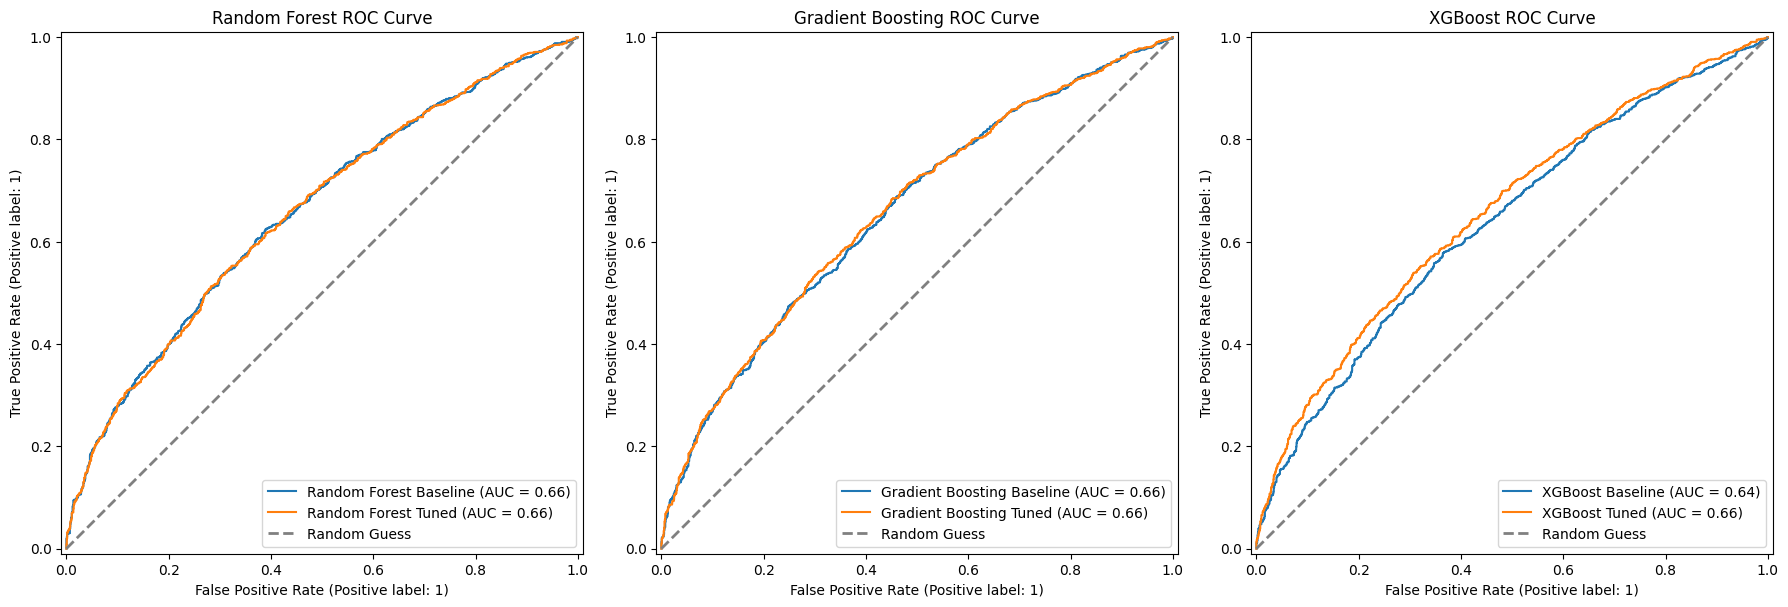

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# ==========================
# Collect probabilities for all models
# ==========================
models_to_plot = {}
# Use the exact keys from your `models` and `tuned_results` dictionaries
selected_models = ["Random Forest", "Gradient Boosting", "XGBoost"]
tuned_model_keys = ["RandomForest", "GradientBoosting", "XGBoost"]

print("Getting probabilities for all models...")
for i, model_name in enumerate(selected_models):
    # Get baseline probabilities
    baseline_model = models[model_name]
    pipe = make_pipeline(baseline_model)
    pipe.fit(X_train, y_train)
    y_prob_baseline = pipe.predict_proba(X_test)[:, 1]
    models_to_plot[model_name + "_Baseline"] = y_prob_baseline

    # Get tuned probabilities
    tuned_key = tuned_model_keys[i]
    best_model = tuned_results[tuned_key]["random_best_estimator"]
    y_prob_tuned = best_model.predict_proba(X_test)[:, 1]
    models_to_plot[model_name + "_Tuned"] = y_prob_tuned

# ==========================
# Plot ROC-AUC Curves on separate subplots
# ==========================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Random Forest
ax_rf = axes[0]
RocCurveDisplay.from_predictions(
    y_test,
    models_to_plot["Random Forest_Baseline"],
    name="Random Forest Baseline",
    ax=ax_rf
)
RocCurveDisplay.from_predictions(
    y_test,
    models_to_plot["Random Forest_Tuned"],
    name="Random Forest Tuned",
    ax=ax_rf
)
ax_rf.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guess')
ax_rf.set_title("Random Forest ROC Curve")
ax_rf.legend(loc="lower right")

# Plot for Gradient Boosting
ax_gb = axes[1]
RocCurveDisplay.from_predictions(
    y_test,
    models_to_plot["Gradient Boosting_Baseline"],
    name="Gradient Boosting Baseline",
    ax=ax_gb
)
RocCurveDisplay.from_predictions(
    y_test,
    models_to_plot["Gradient Boosting_Tuned"],
    name="Gradient Boosting Tuned",
    ax=ax_gb
)
ax_gb.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guess')
ax_gb.set_title("Gradient Boosting ROC Curve")
ax_gb.legend(loc="lower right")

# Plot for XGBoost
ax_xgb = axes[2]
RocCurveDisplay.from_predictions(
    y_test,
    models_to_plot["XGBoost_Baseline"],
    name="XGBoost Baseline",
    ax=ax_xgb
)
RocCurveDisplay.from_predictions(
    y_test,
    models_to_plot["XGBoost_Tuned"],
    name="XGBoost Tuned",
    ax=ax_xgb
)
ax_xgb.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guess')
ax_xgb.set_title("XGBoost ROC Curve")
ax_xgb.legend(loc="lower right")

plt.tight_layout()
plt.show()

# **SAVING THE MODEL AS PICKLE FILE**

In [ ]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# ==========================
# Define Best Model (Random Forest with tuned hyperparams)
# ==========================
best_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="log2",
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# ==========================
# Build Full Pipeline (custom transformers + preprocessor + model)
# ==========================
# IMPORTANT: use your custom pipeline builder, not sklearn’s make_pipeline
def build_pipeline(model):
    return Pipeline([
        ('age_encoder', AgeEncoder()),        # custom transformer
        ('feature_creator', FeatureCreator()),# custom transformer
        ('preprocessor', preprocessor),       # ColumnTransformer
        ('classifier', model)                 # final model
    ])

final_pipeline = build_pipeline(best_rf)

# Fit the final pipeline on training data
final_pipeline.fit(X_train, y_train)

# ==========================
# Store Feature Metadata
# ==========================
onehot_features = list(
    final_pipeline.named_steps['preprocessor']
    .named_transformers_['onehot']
    .get_feature_names_out(onehot_cols)
)
final_features = numerical_cols + onehot_features + labelencode_cols

# ==========================
# Package Everything
# ==========================
rf_package = {
    "pipeline": final_pipeline,      # full preprocessing + model pipeline
    "threshold": 0.4,                # tuned threshold (can change later)
    "feature_names": final_features, # metadata for explainability
    "model_version": "random_forest_tuned_v1"
}

# ==========================
#  Save Pickle
# ==========================
with open("readmission_randomforest.pkl", "wb") as f:
    pickle.dump(rf_package, f)

print(" Pickle file saved as readmission_randomforest.pkl")


✅ Pickle file saved as readmission_randomforest.pkl


In [ ]:
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score

# ==========================
# Load Pickle Model
# ==========================
with open("/content/readmission_randomforest.pkl", "rb") as file:
    loaded_model_package = pickle.load(file)

# Extract the pipeline and threshold from the loaded package
loaded_pipeline = loaded_model_package["pipeline"]
loaded_threshold = loaded_model_package["threshold"]
loaded_feature_names = loaded_model_package["feature_names"] # Optional: for inspection

# ==========================
# Run Predictions
# ==========================
# Use the loaded pipeline to make predictions on the test set
y_pred = loaded_pipeline.predict(X_test)   # class predictions
y_prob = loaded_pipeline.predict_proba(X_test)[:, 1]  # probability predictions

# ==========================
# Evaluate Performance
# ==========================
print(" Pickle model loaded successfully!")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# You can also evaluate with the loaded threshold if needed, e.g.:
# y_pred_thresholded = (y_prob >= loaded_threshold).astype(int)
# print(f"Accuracy with threshold {loaded_threshold}:", accuracy_score(y_test, y_pred_thresholded))

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


✅ Pickle model loaded successfully!
Accuracy: 0.6192
Recall:  0.502127659574468
ROC-AUC: 0.6563063829787235
